**Why do I want to have regression analysis? What's the point?**

Three major uses for regression analysis are:

1.   determining the strength of predictors
2.   forecasting an effect
3.   trend forecasting


First, the regression might be used to identify the strength of the effect that the independent variable(s) have on a dependent variable. 

Second, it can be used to forecast effects or impact of changes.  That is, the regression analysis helps us to understand how much the dependent variable changes with a change in one or more independent variables.  

Third, regression analysis predicts trends and future values.  The regression analysis can be used to get point estimates.  



**Time to get down and dirty with linear regression**

Let's play around with some data. For this example, we are going to need to import the necessary packages, datasets, and metrics from scikit-learn.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

We now need to divide that data we just loaded into usable sets. In order to simplifly the computation, we will be taking only feature from the available 13. For our exercise, the third feature from the Boston House-Prices dataset will be used.

In [13]:
# Load the Boston House-Prices dataset
housing_X, housing_y = datasets.load_boston(return_X_y=True)

# Use only one feature
housing_X = housing_X[:, np.newaxis, 5]



Time to create the training and testing sets to use in our regression.

In [15]:
# Split the data into training/testing sets
housing_X_train = housing_X[:-40]
housing_X_test = housing_X[-40:]

# Split the targets into training/testing sets
housing_y_train = housing_y[:-40]
housing_y_test = housing_y[-40:]



Regression Time! 

We are now at the part that we have all been waiting for. 

First, we have to create the regression object from the linear model. 

Second, it's time to train our model using the training sets that we created earlier. 

Third, we create the price prediction from the INDUS test set that we created.

In [16]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(housing_X_train, housing_y_train)

# Make predictions using the testing set
housing_y_pred = regr.predict(housing_X_test)



Let see some results of our tests.

**Coefficients:** Regression coefficients are estimates of the unknown population parameters and describe the relationship between a predictor variable and the response. In linear regression, coefficients are the values that multiply the predictor values.

**MSE:** The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences.

**R2 Score:** R-squared is a statistical measure of how close the data is to the fitted regression line. Whereas correlation explains the strength of the relationship between an independent and dependent variable, R-squared explains to what extent the variance of one variable explains the variance of the second variable. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

In [17]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(housing_y_test, housing_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(housing_y_test, housing_y_pred))



Coefficients: 
 [9.14720359]
Mean squared error: 15.85
Coefficient of determination: 0.25


Now for the fruits of our labor. Our results in a visual representation.

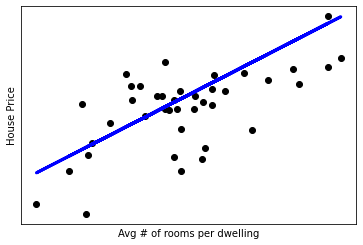

In [19]:
# Plot outputs
plt.scatter(housing_X_test, housing_y_test,  color='black')
plt.plot(housing_X_test, housing_y_pred, color='blue', linewidth=3)

plt.xlabel("Avg # of rooms per dwelling")
plt.ylabel("House Price")
plt.xticks(())
plt.yticks(())

plt.show()

**We have all this data but how do we organize it? Logistic Regression to the rescue!**

What do you do when when you need to make a decision based on a set of data? How does one organzie the information received? Well have no fear, logistic regression is here to save the day! 

In statistics, the logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead, etc. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.



**Let's dip our toe into the logistic regression waters**

Here we are going to play around with the Iris dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X,y)


**Time for some quick maths...for our computers**

The predict() function will predict the class labels for our sample.

The predict_proba() function calculates the probability estimates.

The score() function returns the mean accuracy on the given test data and labels.

In [ ]:
print(clf.predict(X[:2, :]))
print(clf.predict_proba(X[:2, :]))
print(clf.score(X,y))

**Linear Regression vs Logistic Regression. Ready? Fight!**

So what is the difference between a linear regression and a logistic regression? 


1.   Linear regression is a supervised regression model while a logistic regression is a supervised classification model
2.   Linear regression has a continuous response variable (eg. weight, height, etc.) while a logisitc regression has response variables that are categorical in nature (eg. yes/no, red/green/blue, etc.)
3.  Linear is based on the least square estimation while logistic is based on maximum likelihood estimation






**Let's do another logistic regression with the same dataset but visualize our output**

Like with our linear regression exercise, we need to import the necessary packages, datasets, and models.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Now that we have our Iris dataset loaded, it is time to grab features and a target for our regression.

In [ ]:

X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

print("data", X)
print("target", Y)

Once we have our sets we will then create a Logistic Regression Classifier instance and fit the data to each other.

In [4]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)

logreg.fit(X, Y)



LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Time to plot our data. First, we need to create decision boundaries. 

**Decision Boundary:** a decision boundary or decision surface is a hypersurface that partitions the underlying vector space into sets, one for each class. The classifier will classify all the points on one side of the decision boundary as belonging to one class and all those on the other side as belonging to the other class or classes.

In [5]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])



Let's add a splash of color! 

Also we are going to plot our training points.

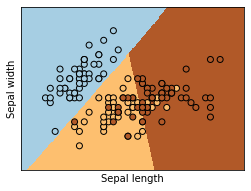

In [6]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()
